# Suicide rate - Udemy

https://www.udemy.com/course/data-science-in-healthcare/

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/suicide/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


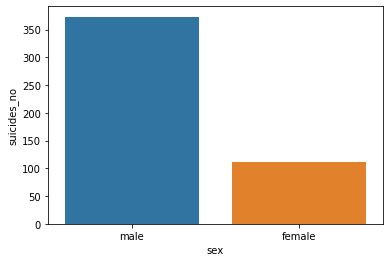

In [16]:
sns.barplot(x='sex', y='suicides_no', ci=None, data=df)

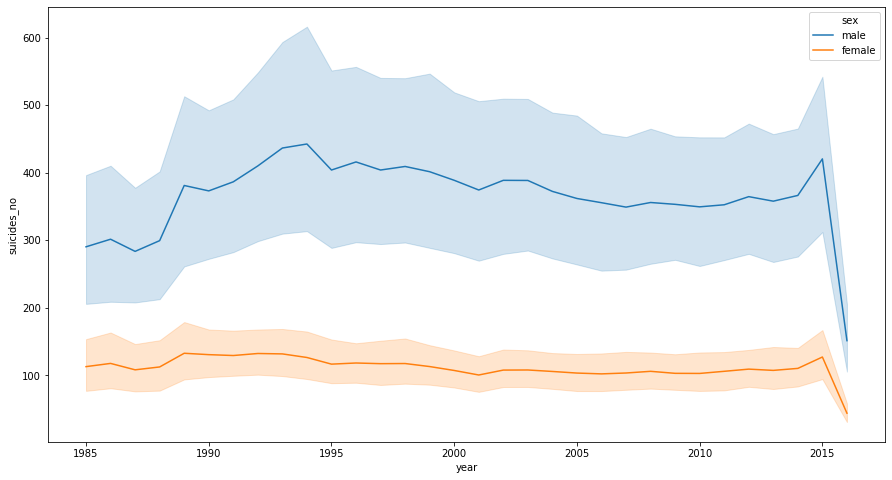

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year', y='suicides_no', hue='sex', data=df)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['generation'] = le.fit_transform(df['generation'])
df.fillna(0, inplace=True)
df.drop(columns=['country', 'country-year', 'age'], axis=1, inplace=True)
df['gdp_for_year'] = df[' gdp_for_year']
df.drop(' gdp_for_year', axis=1, inplace=True)
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '')
df['gdp_for_year'] = df['gdp_for_year'].astype('float')
print(df)
print(df.info())

       year  sex  suicides_no  population  suicides/100k pop  HDI for year  \
0      1987    1           21      312900               6.71         0.000   
1      1987    1           16      308000               5.19         0.000   
2      1987    0           14      289700               4.83         0.000   
3      1987    1            1       21800               4.59         0.000   
4      1987    1            9      274300               3.28         0.000   
...     ...  ...          ...         ...                ...           ...   
27815  2014    0          107     3620833               2.96         0.675   
27816  2014    0            9      348465               2.58         0.675   
27817  2014    1           60     2762158               2.17         0.675   
27818  2014    0           44     2631600               1.67         0.675   
27819  2014    0           21     1438935               1.46         0.675   

       gdp_per_capita  generation  gdp_for_year  
0            

In [19]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
year                 27820 non-null int64
sex                  27820 non-null int32
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
HDI for year         27820 non-null float64
gdp_per_capita       27820 non-null int64
generation           27820 non-null int32
gdp_for_year         27820 non-null float64
dtypes: float64(3), int32(2), int64(4)
memory usage: 1.7 MB


Index(['year', 'sex', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita', 'generation', 'gdp_for_year'],
      dtype='object')

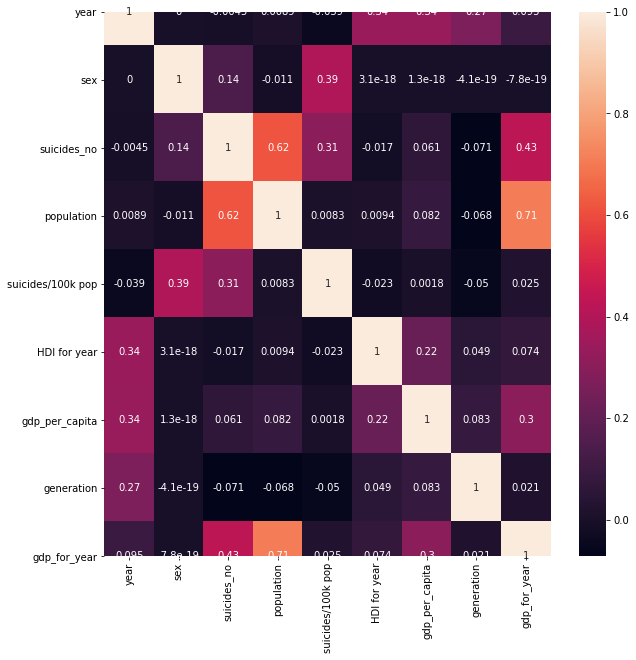

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\joeba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\joeba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


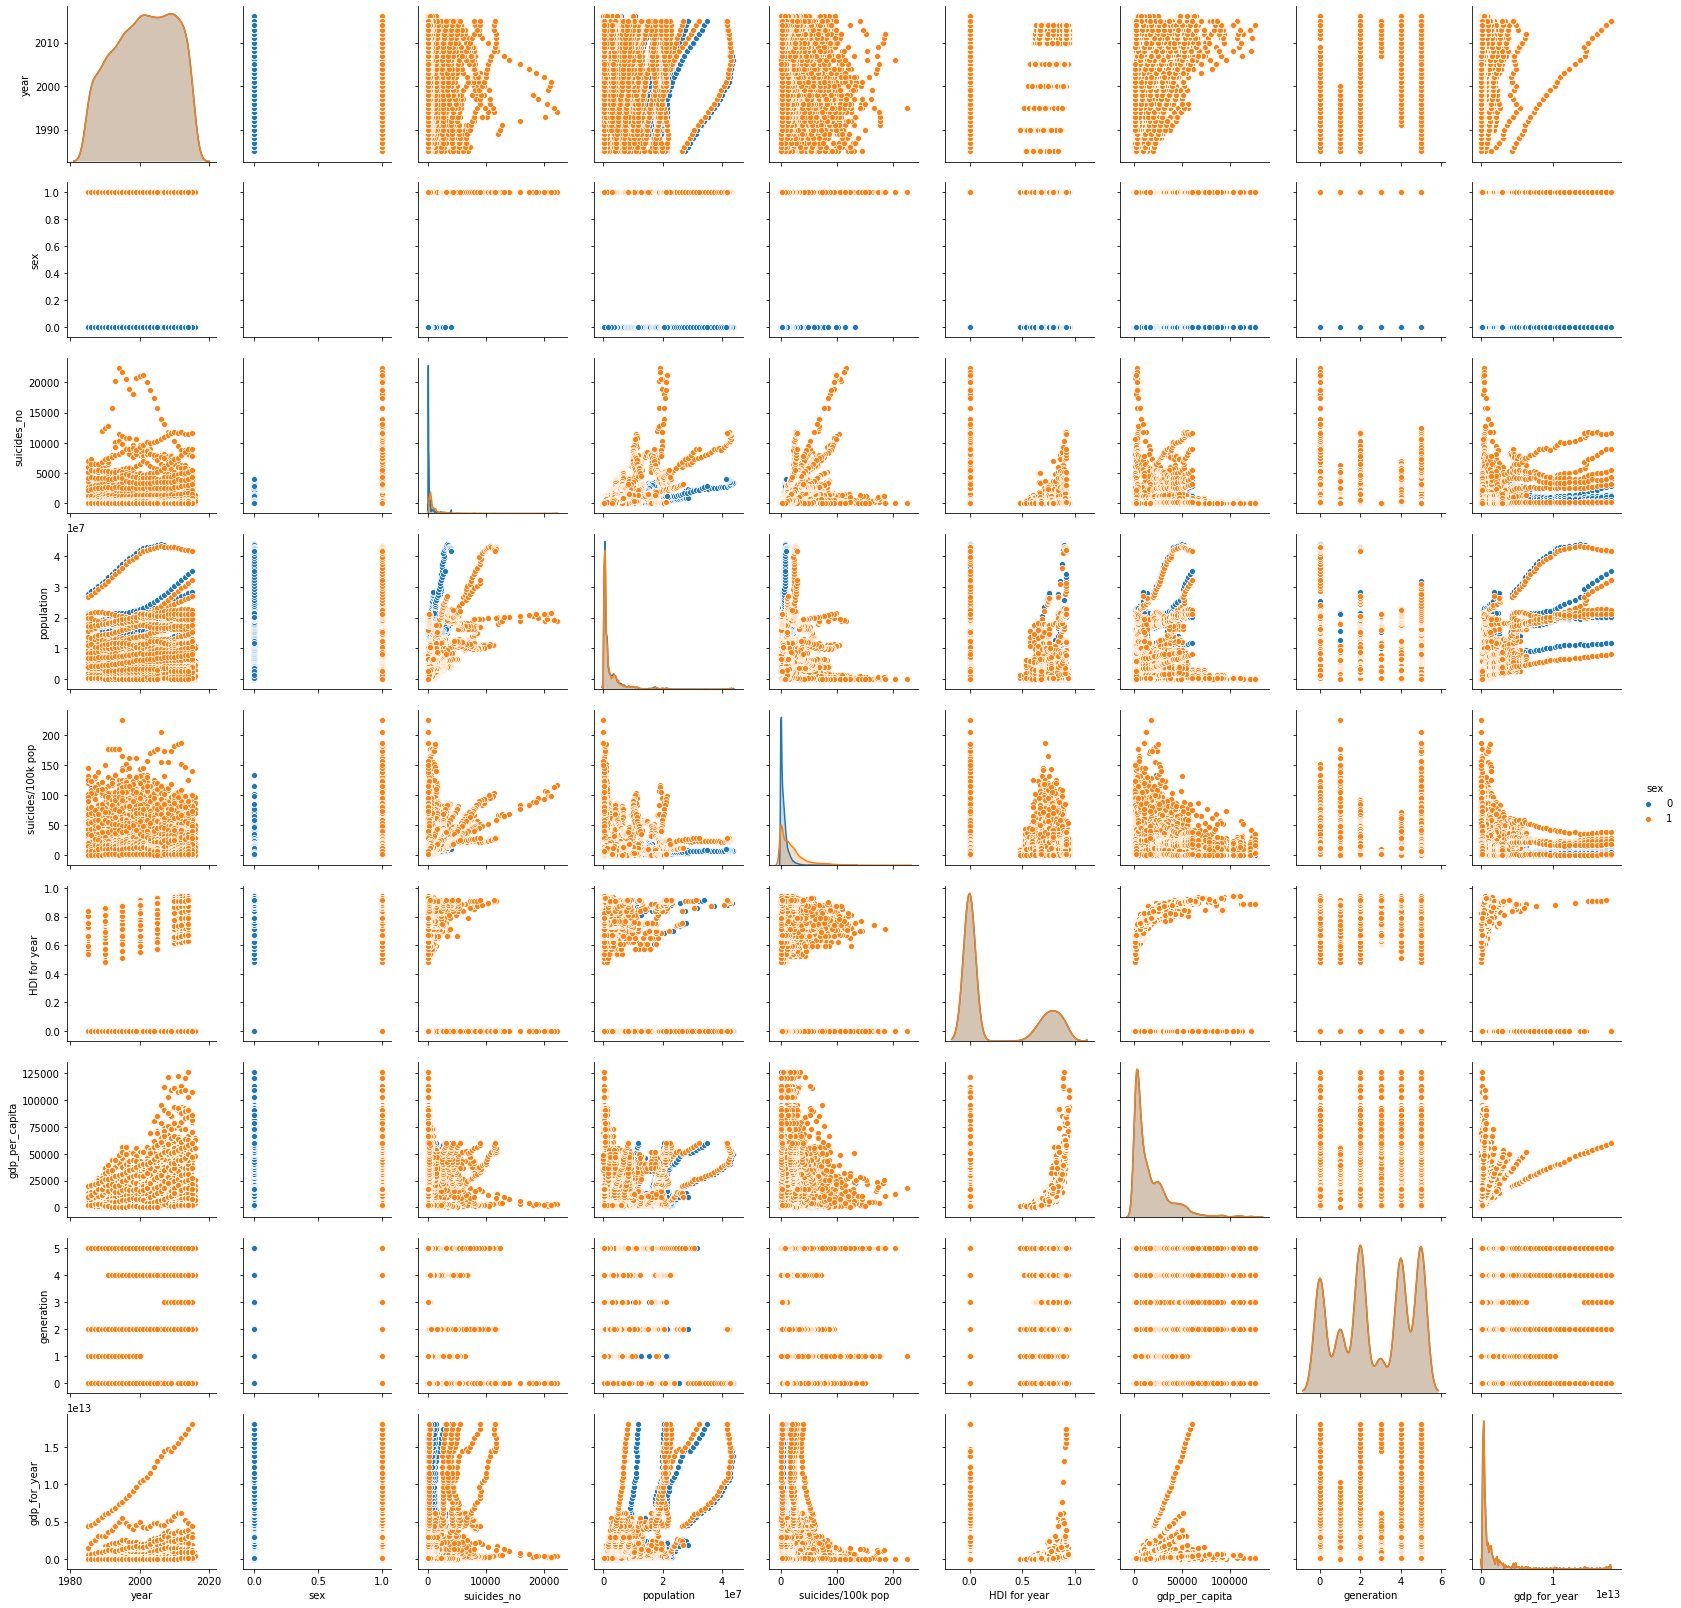

In [21]:
sns.pairplot(data=df,hue='sex')

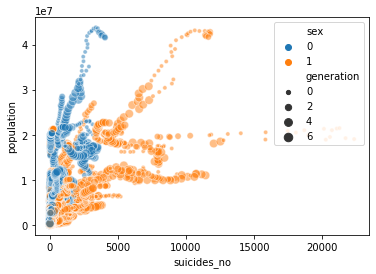

In [47]:
sns.scatterplot(x='suicides_no', y='population', data=df, hue='sex', alpha=0.5, size='generation')

In [22]:
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20865, 8) (20865,) (6955, 8) (6955,)


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [31]:
rf = RandomForestRegressor(n_estimators=50, random_state=1223, criterion='mse')
rf.fit(X_train, y_train)

In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
sv = SVR()
sv.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred_rf = rf.predict(X_test)

In [33]:
y_pred_dt = dt.predict(X_test)

In [34]:
y_pred_lr = lr.predict(X_test)

In [35]:
y_pred_sv = sv.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error as mser
print('RMSE for Random Forest = ', np.sqrt(mser(y_test, y_pred_rf)))
print('RMSE for Decision Tree = ', np.sqrt(mser(y_test, y_pred_dt)))
print('RMSE for Linear Regression = ', np.sqrt(mser(y_test, y_pred_lr)))
print('RMSE for Support Vector Regressor = ', np.sqrt(mser(y_test, y_pred_sv)))

RMSE for Random Forest =  81.47980429535055
RMSE for Decision Tree =  211.4342171484186
RMSE for Linear Regression =  702.4492357428171
RMSE for Support Vector Regressor =  930.876491760985


In [38]:
y_test

12165     99
24450      1
13270      0
11367    263
5298       1
        ... 
13247      0
3462       3
3976       0
6735      51
2229      18
Name: suicides_no, Length: 6955, dtype: int64

In [39]:
y_pred_rf

array([99.3 ,  1.  ,  0.  , ...,  0.  , 50.32, 17.88])